### Problem Statement

- Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 


- The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 

In [1]:
# importing operating system
import os

# importing open cv
import cv2

# importing tensorflow (framework to build and train deep learning models)
import tensorflow as tf

# For numerical analysis
import numpy as np

# importing the keras api
from tensorflow.keras import layers, optimizers

# importing Resudial network
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout

from tensorflow.keras.models import Model, load_model

from tensorflow.keras import backend as K
# to Generate batches of images from our directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

# For data visualization
import matplotlib.pyplot as plt

# For data visualization
import seaborn as sns

# Dataframe manupalation
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Training data

SJT_directory = 'C:\\Users\\charl\\Desktop\\Study\\DataTrained\\Internship\\Image Classification\\Dataset'                

In [4]:
# Listing the folders in our directory

os.listdir(SJT_directory)

['0', '1', '2']

In [5]:
# We need to normalize the images

image_generator = ImageDataGenerator(rescale=1./255,validation_split= 0.2)

# Using 20% of the data for cross validation

In [6]:
# Generate a batch of 40 images


train_generator = image_generator.flow_from_directory(batch_size=40,directory=SJT_directory,
                                                     shuffle=True,target_size=(256,256),
                                                     class_mode='categorical',subset='training')

Found 540 images belonging to 3 classes.


In [7]:
# Creating validation generator

validation_generator = image_generator.flow_from_directory(batch_size=40,directory=SJT_directory,
                                                     shuffle=True,target_size=(256,256),
                                                     class_mode='categorical',subset='validation')

Found 135 images belonging to 3 classes.


In [8]:
# Generate a batch of 40 images and labels

train_images, train_labels = next(train_generator)

In [9]:
# Checking shape

train_images.shape

(40, 256, 256, 3)

In [10]:
# label shape

train_labels.shape

(40, 3)

In [11]:
train_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
# Label Translator

label_names = {0:"Saree",1:"Trousers",2:"Jeans"}

In [13]:
label_names

{0: 'Saree', 1: 'Trousers', 2: 'Jeans'}

### Visualization of Dataset

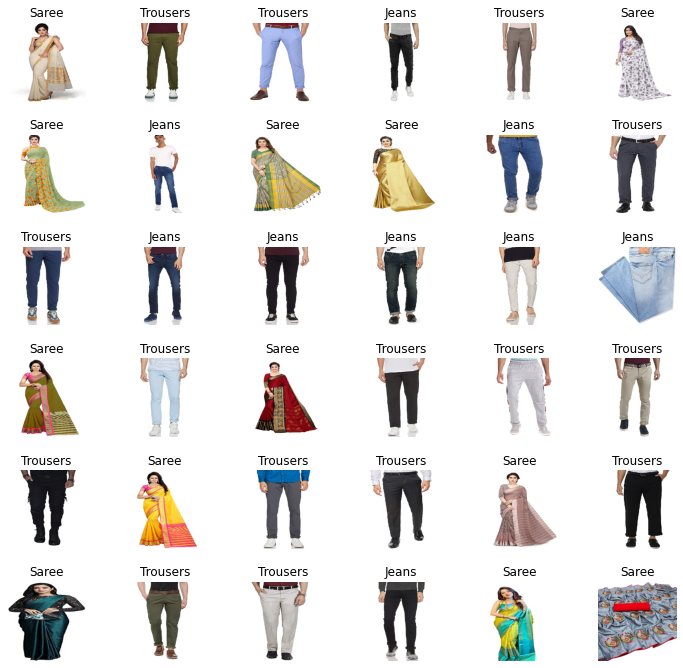

In [14]:
# Create a grid of 36 images along with their corresponding labels
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))

# Using ravel to flatten the axis
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)    

In [15]:
# We can clearly see there are three classes namely Saree, Trousers and Jeans

### Importing Model with pretrained weights

In [16]:
# defining the base model

basemodel = ResNet50(weights = 'imagenet', include_top = False,
                     input_tensor = Input(shape=(256, 256, 3)))

In [17]:
#Summary
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [18]:
# Freezing layers in model

for layer in basemodel.layers[:-10]:
    
    layers.trainable = False

### Building And Training A Deep Learning Model

In [19]:
headmodel = basemodel.output

headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)

headmodel = Flatten(name = 'flatten')(headmodel)

headmodel = Dense(256, activation = 'relu') (headmodel)

headmodel = Dropout(0.3)(headmodel)

headmodel = Dense(128, activation = 'relu') (headmodel)

headmodel = Dropout(0.2)(headmodel)

headmodel = Dense(3, activation = 'softmax') (headmodel)

In [20]:
# Building the final model

model = Model(inputs = basemodel.input, outputs = headmodel)

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 1e-4),
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [23]:
# Using early stopping to avoid overfitting

earlystopping = EarlyStopping(monitor = 'val_loss',mode = 'min', patience = 20)

In [24]:
# Only save the best model

checkpointer = ModelCheckpoint(filepath='stjweights.hdf5', verbose = 1, save_best_only = True)

In [25]:
# For Train

train_generator = image_generator.flow_from_directory(batch_size = 4, directory = SJT_directory,
                                                     shuffle = True, target_size = (256,256),
                                                     class_mode='categorical',subset='training')

Found 540 images belonging to 3 classes.


In [26]:
# For validation

val_generator = image_generator.flow_from_directory(batch_size = 4, directory = SJT_directory,
                                                     shuffle = True, target_size = (256,256),
                                                     class_mode='categorical',subset='validation')

Found 135 images belonging to 3 classes.


In [27]:
# Training the model

history = model.fit_generator(train_generator, epochs = 25, validation_data = val_generator,
                             callbacks = [checkpointer,earlystopping])

Epoch 1/25
135/135 [==============================] - 349s 2s/step - loss: 0.5711 - accuracy: 0.7778 - val_loss: 1.0905 - val_accuracy: 0.3556

Epoch 00001: val_loss improved from inf to 1.09050, saving model to stjweights.hdf5
Epoch 2/25
135/135 [==============================] - 355s 3s/step - loss: 0.3201 - accuracy: 0.8907 - val_loss: 1.1540 - val_accuracy: 0.2667

Epoch 00002: val_loss did not improve from 1.09050
Epoch 3/25
135/135 [==============================] - 346s 3s/step - loss: 0.2108 - accuracy: 0.9333 - val_loss: 1.0065 - val_accuracy: 0.4667

Epoch 00003: val_loss improved from 1.09050 to 1.00652, saving model to stjweights.hdf5
Epoch 4/25
135/135 [==============================] - 347s 3s/step - loss: 0.1758 - accuracy: 0.9481 - val_loss: 0.8266 - val_accuracy: 0.5111

Epoch 00004: val_loss improved from 1.00652 to 0.82661, saving model to stjweights.hdf5
Epoch 5/25
135/135 [==============================] - 340s 3s/step - loss: 0.1309 - accuracy: 0.9722 - val_loss: 

### Evaluate Trained Deep Learning Model

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

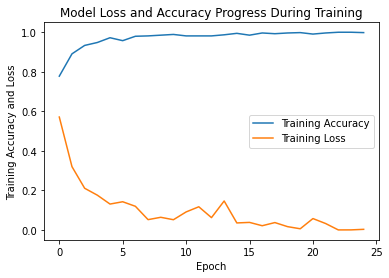

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

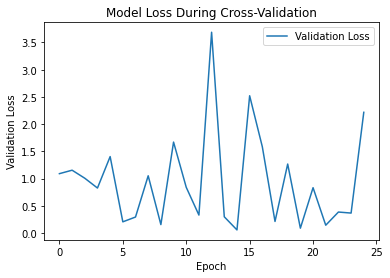

In [30]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

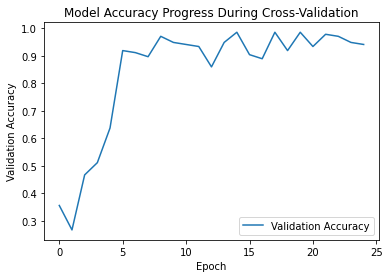

In [31]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [32]:
test_directory = 'C:\\Users\\charl\\Desktop\\Study\\DataTrained\\Internship\\Image Classification\\Test'

In [33]:
test_gen = ImageDataGenerator(rescale = 1./255)

In [34]:
test_generator = test_gen.flow_from_directory(batch_size = 40, 
                                              directory= test_directory, 
                                              shuffle= True, target_size=(256,256), 
                                              class_mode= 'categorical')

Found 30 images belonging to 3 classes.


In [35]:
evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 3, verbose = 1)

10/10 [==============================] - 4s 148ms/step - loss: 0.2834 - accuracy: 0.9667


In [36]:
print('Accuracy Test : {}'.format(evaluate[1]))

Accuracy Test : 0.9666666388511658


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    
    for item in os.listdir(os.path.join(test_directory,str(i))):
        
        img= cv2.imread(os.path.join(test_directory,str(i),item))
    
        img = cv2.resize(img,(256,256))
    
        image.append(img)
    
        img = img / 255
    
        img = img.reshape(-1,256,256,3)
    
        predict = model.predict(img)
    
        predict = np.argmax(predict)
    
        prediction.append(predict)
    
        original.append(i)

In [39]:
len(original)

30

In [40]:
score = accuracy_score(original,prediction)

print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8666666666666667


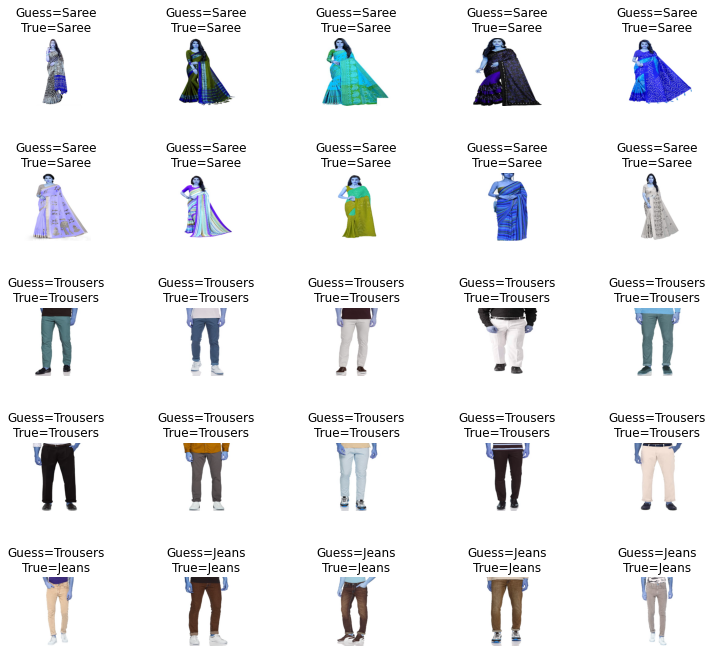

In [41]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

In [42]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      1.00      0.83        10
           2       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30



Text(0.5, 1.0, 'Confusion_matrix')

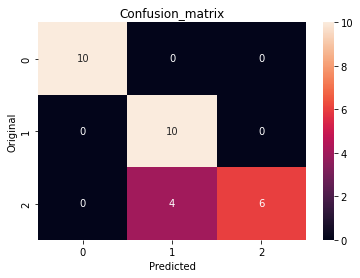

In [43]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

### Saving Model

In [44]:
# save model and architecture to single file

model.save("stjmodel.h5")

print("Saved model to disk")

Saved model to disk
